## Colloid in Double harmonic trap

In [2]:
#Libraries
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
#style of plots
mpl.style.use('tableau-colorblind10')

#library for autocorrelation function
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit

#### Analysys of simulations

In [65]:
#Listing the simulations
folder = 'code_double_trap/output'
files = os.listdir(folder)
files = sorted(files)


#definitions useful for the analysis
N_cut = 1000

def aut_time(acf):
    tau = 0
    for i in range(len(acf)):
        if acf[i] < np.exp(-1):
            tau = i
            break
    return tau

dt = 0.01

x1_c = 8
y1_c = 10

x2_c = 12
y2_c = 10

def find_sign_change_index(arr):
    sign_change_indices = []
    for i in range(1, len(arr)):
        if arr[i] * arr[i-1] < 0:
            sign_change_indices.append(i)
    return np.array(sign_change_indices)

df = pd.DataFrame(columns=['delta_r', 'tau_mean', 'tau_std'])

In [66]:
for file in files:    
    #extracting parameters from the file name with regex
    pattern_N = r"N_(.*?)_time"
    N = int(re.findall(pattern_N, file)[0])

    pattern_T = r"ture_(.*?)_gamma"
    T = float(re.findall(pattern_T, file)[0])

    pattern_gamma = r"gamma_(.*?)_K"
    gamma = float(re.findall(pattern_gamma, file)[0])

    pattern_K = r"K_(.*?)_delta_r"
    K = float(re.findall(pattern_K, file)[0])

    pattern_r = r"delta_r_(.*?)_real"
    r = float(re.findall(pattern_r, file)[0])

    print('N:', N, 'Temperature:', T, 'Friction coefficient:', gamma, 'Elastic coefficient:', K, 'delta_r:', r)


    #loading the data
    data = np.loadtxt(folder + '/' + file)

    #time
    time = data[:,0]
    time = np.unique(time)
    
    #position
    x = data[:,2].reshape(len(time), -1)
    y = data[:,3].reshape(len(time), -1)

    #estimation of MFPT
    taus = []
    for i in range(N):
        '''AssertionError
        sign = 10.0-x[:,i]
        jump = find_sign_change_index(sign)
        taus.append(jump[1:]-jump[:-1])
        '''
        taus.append(np.where(x[:,i] > 10.0)[0][0])

    taus = np.array(taus)*dt
    tau_mean = np.mean(taus)
    tau_std = np.std(taus)

    #plot
    if (r == 1.0):
        for i in range(2):
            plt.scatter(x[:,i], y[:,i], s=1)

        plt.scatter(x1_c, y1_c, c='k', s=100, marker='x')
        plt.scatter(x2_c, y2_c, c='k', s=100, marker='x') 
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(r'$T = $' + str(T) + r', $\gamma = $' + str(gamma) + r', $K = $' + str(K) + r', $\Delta r = $' + str(r))
        plt.savefig('plots/example_double_trap.png')

    
    df.loc[len(df)] = [r, tau_mean, tau_std]

N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 1.0 delta_r: 0.0
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 1.0 delta_r: 0.2
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 1.0 delta_r: 0.4
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 1.0 delta_r: 0.6
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 1.0 delta_r: 0.8
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 1.0 delta_r: 1.0
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 1.0 delta_r: 1.2
N: 400 Temperature: 1.0 Friction coefficient: 1.0 Elastic coefficient: 1.0 delta_r: 1.4


In [ ]:
df.head()

delta_r   tau_mean    tau_std
0      0.0  54.923579  26.222570
1      0.2  54.289930  26.357260
2      0.4  54.221826  26.716096
3      0.6  53.949993  26.884519
4      0.8  53.181079  26.987136

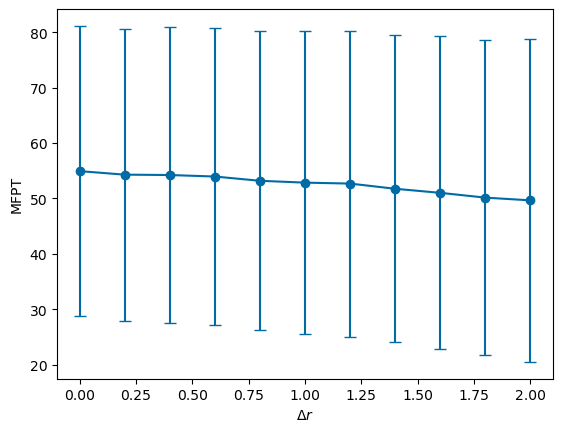

In [ ]:
plt.errorbar(df['delta_r'], df['tau_mean'], yerr=df['tau_std'], fmt='o-', capsize = 4)
plt.xlabel(r'$\Delta r$')
plt.ylabel(r'MFPT')
plt.savefig('plots/MFPT_double_trap.png')